# Grass et les vecteurs

## Création de la session jupyter pour le workshop

Dans les parties précédentes, nous avons réalisé la création du jeu de données.
Nous allons maintenant configurer Jupyter pour utiliser les modules grass en python. Les commandes unix ou windows seront données après les commandes python Jupyter.

Le code suivant va charger les modules grass et ouvre la session grass avec le Jeu de données `megeve\urbanisme`



In [58]:
# Import Python standard library and IPython packages we need.
import subprocess
import sys

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Start GRASS Session
session = gj.init("~/grassdata", "megeve", "urbanisme")

# Defines datadir
from pathlib import Path
import os
datadir = os.getcwd() / Path('data')

C'est l'équivalent de :


Unix :

```
grass $HOME/grassdata/megeve/urbanisme
```

Windows :

```
C:\OSGeo4W\bin\grass83.bat %HOMEPATH%\grassdata\megeve\urbanisme
```

Il y a deux APIs Python pour accéder aux outils - [GRASS GIS Python Scripting Library](https://grass.osgeo.org/grass-stable/manuals/libpython/script_intro.html) et [PyGRASS](https://grass.osgeo.org/grass-stable/manuals/libpython/pygrass_index.html).
PyGRASS est plus intéressant pour les processus avancés. Ici, nous utiliserons le Python Scripting Library (`import grass.script as gs`)
puisqu'il est simple et facile à utiliser.


La bibliothèque de scripting Python de GRASS GIS fournit des fonctions pour appeler les modules GRASS au sein de scripts en tant que sous-processus. Les fonctions les plus couramment utilisées comprennent :

* [run_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.run_command) : utilisée avec des modules qui produisent des données raster/vectorielles où une sortie textuelle n'est pas attendue.
* [read_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.read_command) : utilisée lorsque nous sommes intéressés par la sortie textuelle.
* [parse_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.parse_command) : utilisée avec des modules produisant une sortie textuelle sous forme de paire clé=valeur.
* [write_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.write_command) : pour les modules qui attendent une entrée textuelle à partir de l'entrée standard ou d'un fichier.

Il fournit également plusieurs fonctions enveloppantes pour les modules fréquemment appelés. La liste des fonctions enveloppantes pratiques avec des exemples comprend :

* Métadonnées raster en utilisant [raster_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.raster_info) : `gs.raster_info('dsm')`
* Métadonnées vectorielles en utilisant [vector_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.vector.vector_info) : `gs.vector_info('roads')`
* Liste des données raster dans l'emplacement actuel en utilisant [list_grouped()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.list_grouped) : `gs.list_grouped(type=['raster'])`
* Obtenir la région de calcul actuelle en utilisant [region()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.region) : `gs.region()`
* Exécuter une algèbre raster en utilisant [mapcalc()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.mapcalc) : `gs.mapcalc()`

## Intégration des données (vecteur)

https://grass.osgeo.org/grass82/manuals/vectorintro.htmlLe mode par défaut de 

GRest de stocker ses données dans sa propre base. Il s'agit en fait d'un son "répertoir
e". Heureusement on peut partager des données à l'intérieur de la même localisati
on. Sauf à vouloir travailler en script/ETL, Grass doit dupliquer cette donnée, il n'y a pas de partage possible d'un shapefile entre QGIS et GRASS par exemple. Il est par contre possible de "lier" une table postgresql dans grass sans la dupliquant dans GRASS.

Les modules à connaître sont : 

- v.in.ogr
- v.in.ascii
- v- v.import.external

### Intégration d'un fichier shape

On va intégrer le fichier "ZONE_URBA.s qui est dans le dossier data de ce workshop.hp"

- tester avec `v.in.ogr`
- tester avec `v.import`
- lister les données `g.list`
- étendre la région `g.region`

Voir le manuel, pour une définition de la [région](https://grass.osgeo.org/grass-stable/manuals/g.region.html)
ml) `g.

In [11]:
gs.run_command("v.in.ogr", input=f"{datadir}/ZONE_URBA.shp", output="zone_urba", flags="e")

ERROR: Projection of dataset does not appear to match current location.

       Location PROJ_INFO is:
       name: RGF93 v1 / CC46
       ellps: grs80
       proj: lcc
       lat_0: 46
       lon_0: 3
       lat_1: 45.25
       lat_2: 46.75
       x_0: 1700000
       y_0: 5200000
       towgs84: 0,0,0,0,0,0,0
       no_defs: defined

       Dataset PROJ_INFO is:
       name: RGF93 v1 / Lambert-93
       ellps: grs80
       proj: lcc
       lat_0: 46.5
       lon_0: 3
       lat_1: 49
       lat_2: 44
       x_0: 700000
       y_0: 6600000
       towgs84: 0,0,0,0,0,0,0
       no_defs: defined

       Difference in: x_0

       In case of no significant differences in the projection definitions,
       use the -o flag to ignore them and use current location definition.
       Consider generating a new location from the input dataset using the
       'location' parameter.


CalledModuleError: Module run `v.in.ogr -e input=/usr/home/jupyter/notebooks/qgis8_formation_grass/data/ZONE_URBA.shp output=zone_urba` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

*Solution en mode CLI:* 

Unix :

`v.in.ogr -e input=$HOME/data/ZONE_URBA.p`
sh
Windows :

`v.in.ogr -e input=%HOMEPATH%\data\ZONE_URBA.shpp`

Mais cela ne fonctionne pas. Il n'y a pas de projection à la volée.

```
ERREUR : Projection of dataset does not appear to match current location.

         Location PROJ_INFO is:
         name: RGF93 / CC46
         ellps: grs80
         proj: lcc
         lat_0: 46
         lon_0: 3
         lat_1: 45.25
         lat_2: 46.75
         x_0: 1700000
         y_0: 5200000
         towgs84: 0,0,0,0,0,0,0
         no_defs: defined
         init: EPSG:3946

         Le PROJ_INFO du jeu de données est :
         name: RGF93 / Lambert-93
         ellps: grs80
         proj: lcc
         lat_0: 46.5
         lon_0: 3
         lat_1: 49
         lat_2: 44
         x_0: 700000
         y_0: 6600000
         towgs84: 0,0,0,0,0,0,0
         no_defs: defined

         ERROR: x_0

         In case of no significant differences in the projection
         definitions, use the -o flag to ignore them and use current
         location definition.
         Consider generating ng
         the 'location' parameter.
```
a new location from the input dataset usi


On va utiliser le module `v.imrt` :po

In [8]:
!v.import input=$HOME/notebooks/qgis8_formation_grass/data/ZONE_URBA.shp output=zone_urba

Importing
</home/jupyter/notebooks/qgis8_formation_grass/data/ZONE_URBA.shp> ...
Check if OGR layer <ZONE_URBA> contains polygons...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Creating attribute table for layer <ZONE_URBA>...
Default driver / database set to:
driver: sqlite
database: $GISDBASE/$LOCATION_NAME/$MAPSET/sqlite/sqlite.db
Importing 241 features (OGR layer <ZONE_URBA>)...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
-----------------------------------------------------
Registering primitives...
-----------------------------------------------------
Cleaning polygons
-----------------------------------------------------
Breaking polygons...
Breaking polygons (pa

In [3]:
gs.run_command("v.import", input=f"{datadir}/ZONE_URBA.shp", output="zone_urba", overwrite=True, verbose=True)

*Solution en mode CLI:* 

Unix :

`v.import input=$HOME/data/ZONE_URBA.shp output=zone_urba`

Windows :

`v.import input=%HOMEPATH%\data\ZONE_URBA.shp output=zone_urba`
sur les rasters.

On remarque qu'il y a eu une reprojection et quelques corrections dans la topologie.

On vérifie que la couche est bien dans notre jeu de données : 


In [12]:
print(gs.read_command('g.list', type=["vector"]))

zone_urba



On remarque que type est une liste, on peut afficher plusieurs types de données (raster, raster_3d, etc), voir le manuel de [g.list](https://grass.osgeo.org/grass-stable/manuals/g.list.html)

*Solution en mode CLI : *

`g.list type=vector`


## Région de calcul

La [région](https://grass.osgeo.org/grass-stable/manuals/g.region.html) doit être modifiée. 

`g.region -p` va afficher la région. On veut caler celle-ci sur notre jeu de données.

In [10]:
print(gs.read_command('g.region', flags="p"))

projection: 99 (RGF93 v1 / CC46)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      1
south:      0
west:       0
east:       1
nsres:      1
ewres:      1
rows:       1
cols:       1
cells:      1



In [16]:
gs.run_command('g.region', vector="zone_urba")

*Solution en mode CLI : *

`g.region vector=zone_urba`


In [17]:
print(gs.read_command('g.region', flags="p"))

projection: 99 (RGF93 v1 / CC46)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      5192904.57999999
south:      5184231.49999999
west:       1976750.62
east:       1986024.47
nsres:      1.00000922
ewres:      0.99998383
rows:       8673
cols:       9274
cells:      80433402



On affiche la nouvelle région avec `g.region -p` pour afficher. 

La région de calcul est un concept important pour les données raster dans GRASS GIS. 
Avant d'utiliser un module pour calculer une nouvelle carte raster, il est nécessaire de définir correctement la région de calcul. 
Tous les calculs raster seront effectués dans l'étendue spécifiée et avec la résolution donnée. 
Cela nous permet notamment de sous-échantillonner facilement des données à plus grande échelle pour des tests plus rapides d'analyse, ou d'exécuter une analyse sur des régions spécifiques définies par exemple par des unités administratives.

Quelques points à retenir :

- La région de calcul est définie par l'étendue de la région et la résolution des données raster.
- Elle s'applique à toutes les opérations sur les données raster et aux opérations de conversion vectoriel-raster.
- Elle persiste entre les sessions GRASS et peut être différente pour différents ensembles de données (mapsets).
- Avantages : maintient la cohérence des résultats, évite le rognage des données, pour les tâches exigeantes en calcul, définissez la région sur une étendue plus petite, vérifiez que votre résultat est bon, puis définissez la région de calcul sur l'ensemble de la zone d'étude et relancez l'analyse.
- Exécutez la commande `g.region -p` pour afficher les paramètres actuels de la région de calcul.

Nous allons importer les autres vecteurs ("batiment", "commerces", "fp_monument", "fp_voie", "geo_batiment", "geo_commune", "geo_parcelle")
Ceux contenant un "_", nous les importerons en supprimant le préfixe, "fp_monument" deviendra "monument"

In [19]:
shapefiles = ("commerces", "fp_monument", "fp_voie", "geo_batiment", "geo_commune", "geo_parcelle")
for f in shapefiles:
    idx = f.find("_") + 1
    f_output = f[idx:]
    gs.run_command("v.in.ogr", input=f"{datadir}/{f}.shp", output=f_output, flags="e")

Pour l'intégration en ligne de commande, nous procédons comme suit :

Unix :

```sh
v.in.ogr -e input=$HOME/data/batiment.shp output=batiment
v.in.ogr -e input=$HOME/data/commerces.shp output=commerces
v.in.ogr -e input=$HOME/data/fp_monument.shp output=monument
v.in.ogr -e input=$HOME/data/fp_voie.shp output=voie
v.in.ogr -e input=$HOME/data/geo_batiment.shp output=batiment
v.in.ogr -e input=$HOME/data/geo_commune.shp output=commune
v.in.ogr -e input=$HOME/data/geo_parcelle.shp output=parcelle
```

Windows :

```sh
v.in.ogr -e input=%HOMEPATH%\data\batiment.shp output=batiment
v.in.ogr -e input=%HOMEPATH%\data\commerces.shp output=commerces
v.in.ogr -e input=%HOMEPATH%\data\fp_monument.shp output=monument
v.in.ogr -e input=%HOMEPATH%\data\fp_voie.shp output=voie
v.in.ogr -e input=%HOMEPATH%\data\geo_batiment.shp output=batiment
v.in.ogr -e input=%HOMEPATH%\data\geo_commune.shp output=commune
v.in.ogr -e input=%HOMEPATH%\data\geo_parcelle.shp output=parcelle
```

On s'assure de l'intégration des données avec `g.list`

In [24]:
!g.list type=vector

batiment
commerces
commune
monument
parcelle
voie
zone_urba


In [25]:
!v.info batiment

 +----------------------------------------------------------------------------+
 | Name:            batiment                                                  |
 | Mapset:          urbanisme                                                 |
 | Location:        megeve                                                    |
 | Database:        /usr/home/jupyter/grassdata                               |
 | Title:                                                                     |
 | Map scale:       1:1                                                       |
 | Name of creator: jupyter                                                   |
 | Organization:                                                              |
 | Source date:     Wed Jul 19 09:43:50 2023                                  |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

## Votre première analyse


- 1. Utiliser le module `v.info` sur`zone_urba`A et` voi`e. Analyser les différences
- 2. Identifier les données de la couche monument aux coordonnées "1981529.69 5191664.15". Module `v.what`
- 3. Faire une requête sur les zone U* de la couc`zone_urba`RBA affichant les colonnes LIBELLE et l'identifiant unique (cat dans GRASS). Module `v.db.select `
- 4. Compter le nombre de commerces `zone_urba` avec le moduleURBA `v.vect.stats`
- 5. Pareil mais en modifiant la ,t`able` area pour ajouter le résultat
- 6. Une pause graphique : on va afficher la répartition des commerces sur une grille hexag On définira la résolution à 2000 avec le module `g.region`.onale..
- 6.1 Refaire la même manipulation mais avec 200 et ajouter la limite de la commune en rouge (fill_color=none color="255;0;0") à la place des commerces. Cela devra être enregistré en png (moniteur cairo)


In [61]:
# 1. Utilisation du module v.info
print(gs.read_command("v.info", map="zone_urba"))
print(gs.read_command("v.info", map="voie"))
gs.vector_info("voie") # pour une autre forme d'affichage

 +----------------------------------------------------------------------------+
 | Name:            zone_urba                                                 |
 | Mapset:          urbanisme                                                 |
 | Location:        megeve                                                    |
 | Database:        /usr/home/jupyter/grassdata                               |
 | Title:                                                                     |
 | Map scale:       1:1                                                       |
 | Name of creator: jupyter                                                   |
 | Organization:                                                              |
 | Source date:     Tue Jul 18 15:41:44 2023                                  |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

{'name': 'voie',
 'mapset': 'urbanisme',
 'location': 'megeve',
 'database': '/usr/home/jupyter/grassdata',
 'title': '',
 'scale': '1:1',
 'creator': 'jupyter',
 'organization': '',
 'source_date': 'Wed Jul 19 09:37:03 2023',
 'timestamp': 'none',
 'format': 'native',
 'level': 2,
 'num_dblinks': 1,
 'attribute_layer_number': '1',
 'attribute_layer_name': 'fp_voie',
 'attribute_database': '/usr/home/jupyter/grassdata/megeve/urbanisme/sqlite/sqlite.db',
 'attribute_database_driver': 'sqlite',
 'attribute_table': 'voie',
 'attribute_primary_key': 'cat',
 'projection': 'RGF93 v1 / CC46',
 'digitization_threshold': '0.000000',
 'comment': '',
 'north': 5192823.02055488,
 'south': 5184729.38847768,
 'east': 1985514.26588983,
 'west': 1976763.82824342,
 'top': 0.0,
 'bottom': 0.0,
 'nodes': 4814,
 'points': 0,
 'lines': 4809,
 'boundaries': 0,
 'centroids': 0,
 'areas': 0,
 'islands': 0,
 'primitives': 4809,
 'map3d': False}

In [31]:
# 2. information au point 1981529.69,5191664.15 de la couche monument
print(gs.read_command("v.what", flags="a", map="monument", coordinates="1981529.69,5191664.15"))

East: 1981529.69
North: 5191664.15
------------------------------------------------------------------
Map: monument 
Mapset: urbanisme
Type: Area
Sq Meters: 1.810
Hectares: 0.000
Acres: 0.000
Sq Miles: 0.0000
Layer: 1
Category: 21

Driver: sqlite
Database: /usr/home/jupyter/grassdata/megeve/urbanisme/sqlite/sqlite.db
Table: monument
Key column: cat
cat : 21
id : 21
gid : 24
nature : 4
localisat : 167 Route Nationale



In [33]:
# 3. requête sur les zone U* de la couche `zone_urba`
print(gs.read_command("v.db.select", map="zone_urba", columns=["cat","LIBELLE"], where="LIBELLE LIKE 'U%'"))

cat|LIBELLE
1|UX
2|UX
3|UX
4|UX
5|UX
6|UX
7|UX
8|UX
9|UT-oap8
10|UT
11|UT
12|UT
13|UT
14|UT
15|UT
16|UT
17|UT
18|UT
19|UT
20|UT
21|UH3p
22|UH3p
23|UH3p
24|UH3p
25|UH3p
26|UH3p
27|UH3p
28|UH3p
29|UH3p
30|UH3p
31|UH3p
32|UH3p
33|UH3p
34|UH3p
35|UH3p
36|UH3
37|UH3
38|UH3
39|UH3
40|UH3
41|UH3
42|UH3
43|UH3
44|UH3
45|UH3
46|UH3
47|UH3
48|UH3
49|UH3
50|UH3
51|UH3
52|UH3
53|UH3
54|UH3
55|UH3
56|UH3
57|UH3
58|UH3
59|UH3
60|UH2
61|UH2
62|UH2
63|UH2
64|UH2
65|UH2
66|UH2
67|UH2
68|UH2
69|UH2
70|UH2
71|UH2
72|UH1t
73|UH1t
74|UH1t
75|UE
76|UE
77|UE
78|UE
79|UE
80|UE
90|UH1c



In [34]:
# 4. Compter le nombre de commerces par `zone_urba` avec le module `v.vect.stats`
print(gs.read_command("v.vect.stats", points="commerces", area="zone_urba", flags="p"))

area_cat|count
1|7
2|0
3|0
4|0
5|0
6|0
7|0
8|0
9|1
10|2
11|0
12|1
13|1
14|1
15|1
16|0
17|2
18|1
19|1
20|4
21|0
22|0
23|0
24|0
25|0
26|0
27|0
28|1
29|0
30|0
31|0
32|0
33|0
34|0
35|0
36|0
37|0
38|0
39|0
40|0
41|0
42|0
43|0
44|0
45|0
46|0
47|0
48|0
49|0
50|1
51|0
52|0
53|1
54|0
55|0
56|1
57|0
58|0
59|0
60|1
61|0
62|0
63|31
64|0
65|0
66|1
67|0
68|1
69|0
70|0
71|8
72|9
74|10
75|0
76|0
77|1
78|0
79|0
80|0
81|0
82|0
83|0
84|0
85|0
86|0
87|0
88|0
89|0
90|245
91|0
92|0
93|1
95|1
96|0
97|0
98|2
99|0
100|0
101|0
102|0
103|0
104|0
105|1
106|1
107|0
108|0
109|0
110|0
111|0
112|0
113|0
114|0
115|0
116|0
117|0
118|0
119|0
120|0
121|0
122|0
123|0
124|0
125|0
126|0
127|0
128|1
129|0
130|0
131|0
132|0
133|0
134|0
135|0
136|0
137|0
138|0
139|0
140|0
141|0
142|0
143|0
144|0
145|0
146|0
147|0
148|0
149|0
150|0
151|1
152|0
153|0
154|0
155|0
156|0
157|0
158|0
159|0
160|0
161|0
162|0
163|0
164|0
165|4
166|1
167|0
168|0
169|0
170|0
171|0
172|0
173|0
174|0
175|0
176|0
177|0
178|0
179|0
180|0
181|1
182|0
183|0
1

In [36]:
# 5. Enregistrement du nombre de commerces dans une colonne num_points
# Utilisation de run_command puisque l'on n'attend pas de retour
gs.run_command("v.vect.stats", points="commerces", area="zone_urba", count_column="num_points")

In [40]:
# 6. Définition de la résolution sur l'extent du commerces
print(gs.read_command("g.region", vector="commerces", res="2000", flags="pa"))
# on peut également faire
# gs.run_command("g.region", vector="commerces", res="2000", flags="a")
# print(gs.read_command("g.region", flags="p")

projection: 99 (RGF93 v1 / CC46)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      5192000
south:      5184000
west:       1978000
east:       1984000
nsres:      2000
ewres:      2000
rows:       4
cols:       3
cells:      12



In [43]:
# Création d'une grille hexagonale. Elle va utiliser la "res" de la région pour les dimensions de l'hexagone
gs.run_command("v.mkgrid", map="hexagons", flags="h")

In [44]:
# Création de la couche statistiques
gs.run_command("v.vect.stats", points="commerces", areas="hexagons", method="sum", points_column="id", count_column="count", stats_column="sum")

In [45]:
# Définition de la couleur de la couche hexagons
gs.run_command("v.colors", map="hexagons", use="attr", column="count", color="viridis")

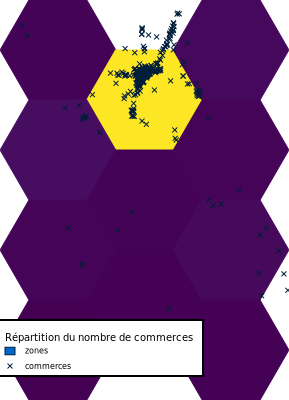

In [58]:
# Instanciation de la carte
hexa_map = gj.Map()
# Ajout des hexagons et des commerces
hexa_map.d_vect(map="hexagons", legend_label="zones")
hexa_map.d_vect(map="commerces")
hexa_map.run("d.legend.vect", flags="b", at="2,20", title="Répartition du nombre de commerces", symbol_size="10", fontsize="8", title_fontsize="10")
# Display map
hexa_map.show()

In [59]:
%%bash
# info de voirie
v.info map=voie
# info de zone_urba
v.info map=zone_urba
# information au point 1981529.69,5191664.15 de la couche monument
# sur unix, on peut également utiliser `echo "1981529.69 5191664.15" | v.what -a monument coordinates=-`
v.what -a monument coordinates=1981529.69,5191664.15
# Requête sur zone_urba. On remarque que c'est du SQL (pour rappel, par défaut, les couches sont en SQLite)
v.db.select map=zone_urba columns=cat,LIBELLE where="LIBELLE LIKE 'U%'"
# Affichage du nombre de commerces
v.vect.stats points=commerces area=zone_urba -p
# Enregistrement du nombre de commerces dans une colonne num_points
v.vect.stats points=commerces area=zone_urba count_column=num_points
# Définition de la résolution sur l'extent du commerces
g.region vector=commerces res=2000 -pa
# Création d'une grille hexagonale. Elle va utiliser la "res" de la région pour les dimensions de l'hexagone
v.mkgrid map=hexagons -h
# Création de la couche statistiques
v.vect.stats points=commerces areas=hexagons method=sum points_column=id count_column=count stats_column=sum
# Définition de la couleur de la couche hexagons
v.colors map=hexagons use=attr column=count color=viridis
# Création du moniteur wx0
d.mon wx0
# Ajout de la couche hexagons ; elle utilisera sa couleur
d.vect hexagons
# Ajout de la couche des commerces
d.vect commerces
# Ajout d'une légende
d.legend.vect -b at=2,20 title="Répartition du nombre de commerces" symbol_size=10 fontsize=8 title_fontsize=10

 +----------------------------------------------------------------------------+
 | Name:            voie                                                      |
 | Mapset:          urbanisme                                                 |
 | Location:        megeve                                                    |
 | Database:        /usr/home/jupyter/grassdata                               |
 | Title:                                                                     |
 | Map scale:       1:1                                                       |
 | Name of creator: jupyter                                                   |
 | Organization:                                                              |
 | Source date:     Wed Jul 19 09:37:03 2023                                  |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

Selecting points for each area...
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
v.vect.stats complete.


area_cat|count
1|7
2|0
3|0
4|0
5|0
6|0
7|0
8|0
9|1
10|2
11|0
12|1
13|1
14|1
15|1
16|0
17|2
18|1
19|1
20|4
21|0
22|0
23|0
24|0
25|0
26|0
27|0
28|1
29|0
30|0
31|0
32|0
33|0
34|0
35|0
36|0
37|0
38|0
39|0
40|0
41|0
42|0
43|0
44|0
45|0
46|0
47|0
48|0
49|0
50|1
51|0
52|0
53|1
54|0
55|0
56|1
57|0
58|0
59|0
60|1
61|0
62|0
63|31
64|0
65|0
66|1
67|0
68|1
69|0
70|0
71|8
72|9
74|10
75|0
76|0
77|1
78|0
79|0
80|0
81|0
82|0
83|0
84|0
85|0
86|0
87|0
88|0
89|0
90|245
91|0
92|0
93|1
95|1
96|0
97|0
98|2
99|0
100|0
101|0
102|0
103|0
104|0
105|1
106|1
107|0
108|0
109|0
110|0
111|0
112|0
113|0
114|0
115|0
116|0
117|0
118|0
119|0
120|0
121|0
122|0
123|0
124|0
125|0
126|0
127|0
128|1
129|0
130|0
131|0
132|0
133|0
134|0
135|0
136|0
137|0
138|0
139|0
140|0
141|0
142|0
143|0
144|0
145|0
146|0
147|0
148|0
149|0
150|0
151|1
152|0
153|0
154|0
155|0
156|0
157|0
158|0
159|0
160|0
161|0
162|0
163|0
164|0
165|4
166|1
167|0
168|0
169|0
170|0
171|0
172|0
173|0
174|0
175|0
176|0
177|0
178|0
179|0
180|0
181|1
182|0
183|0
1

Selecting points for each area...
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
Updating attributes for area vector...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
239 records updated
v.vect.stats complete.


projection: 99 (RGF93 v1 / CC46)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      5192000
south:      5184000
west:       1978000
east:       1984000
nsres:      2000
ewres:      2000
rows:       4
cols:       3
cells:      12


Writing out hexagon grid...
   0  14  28  42  57  71  85 100
Building topology for vector map <hexagons@urbanisme>...
Registering primitives...
Building areas...
   0   2   4   6   8  10  13  15  17  19  21  23  26  28  30  32  34  36  39  41  43  45  47  50  52  54  56  58  60  63  65  67  69  71  73  76  78  80  82  84  86  89  91  93  95  97 100
Attaching islands...
   0 100
Attaching centroids...
   0   9  18  27  36  45  54  63  72  81  90 100
Selecting points for each area...
   9  18  27  36  45  54  63  72  81  90 100
Updating attributes for area vector...
   0   9  18  27  36  45  54  63  72  81  90 100
11 records updated
v.vect.stats complete.
Converting color rules into categories...
   0   8  16  25  33  41  50  58  66  75  83  91 100
Writing color rules...
Color table for vector map <hexagons@urbanisme> set to 'viridis'
d.vect complete.
d.vect complete.
wxdigit.py: Could not load compat.
Unable to access the X Display, is $DISPLAY set properly?


On peut également exporter directement l'image avec le module cairo par exemple :

In [4]:
%%bash
mkdir $HOME/grass_png
# ou d.mon wx0 pour activer le moniteur wx en local
d.mon start=cairo output=$HOME/grass_png/ex_6.png 
d.vect hexagons
d.vect commerces
d.legend.vect -b at=2,20 title="Répartition du nombre de commerces" symbol_size=10 fontsize=8 title_fontsize=10
# étape inutile si le moniteur est wx0
d.mon stop=cairo

d.vect complete.
d.vect complete.


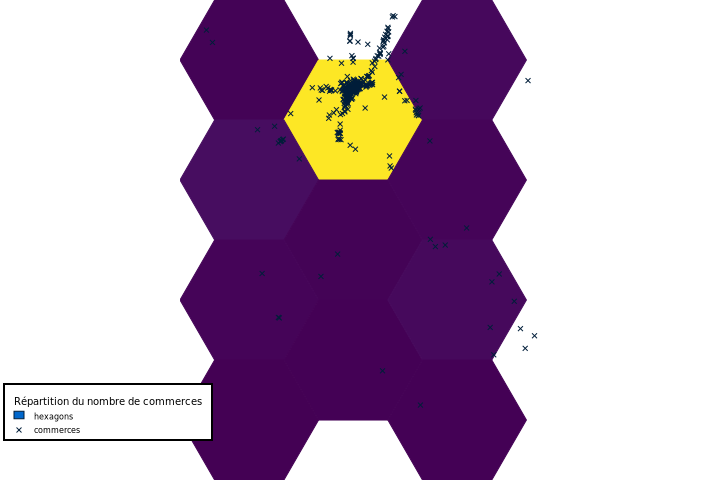

In [10]:
# On utilise IPython pour afficher l'image dans le notebooks
from IPython.display import Image, display
import os
from pathlib import Path
display(Image(filename=Path(os.getenv('HOME')) / 'grass_png' / 'ex_6.png'))

Le code pour la réponse 6.1

In [14]:

%%bash
g.region vector=commerces res=200 -pa
v.mkgrid map=hexagons -h --overwrite
v.vect.stats points=commerces areas=hexagons method=sum points_column=id count_column=count stats_column=sum --overwrite
v.colors map=hexagons use=attr column=count color=viridis --overwrite
d.mon start=cairo output=$HOME/grass_png/ex_6_1.png 
d.vect hexagons
#d.vect commerces
d.vect commune fill_color=none color="255;0;0"
d.mon stop=cairo

projection: 99 (RGF93 v1 / CC46)
zone:       0
datum:      towgs84=0,0,0,0,0,0,0
ellipsoid:  grs80
north:      5191800
south:      5185200
west:       1978400
east:       1984000
nsres:      200
ewres:      200
rows:       33
cols:       28
cells:      924


The number of columns has been adjusted from 28 to 31
Writing out hexagon grid...
   0  10  20  30  40  50  60  70  80  90 100
Building topology for vector map <hexagons@urbanisme>...
Registering primitives...
Building areas...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Attaching islands...
   0 100
Attaching centroids...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Selecting points for each area...
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
Updating attributes for area vector...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  7

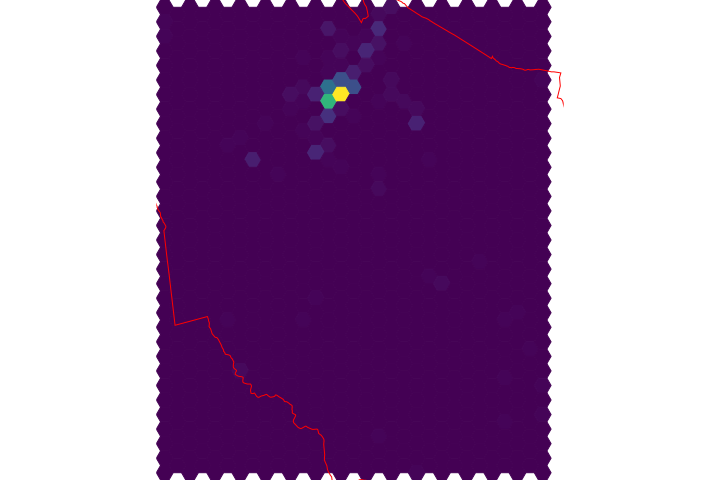

In [15]:
# On utilise IPython pour afficher l'image dans le notebooks
from IPython.display import Image, display
import os
from pathlib import Path
display(Image(filename=Path(os.getenv('HOME')) / 'grass_png' / 'ex_6_1.png'))

### [Urbanisme] Comment faire une analyse spatiale ?

Je souhaite connaître les parcelles en "zone à vocations d'activités économiques" ne possèdant pas de bâtiment.

- `db.select` pour trouver le LIBELLE de la zone
- `v.extract` pour extraire la sélection
- `v.in.ogr` pour intégrer geo_parcelle et geo_batiment (ouptut: parcelles, batiment)
- `v.overlay` pour l'analyse spatiale entre parcelles et zone_urba
- `v.select` pour la sélection des parcelles sans bâtiment



In [18]:
# on cherche à connaître les zone à vocation économique. On réalise une requête SQL pour trouver la zone économique se trouvant dans LIBELONG
print(gs.read_command("db.select", flags="c", sql="select DISTINCT LIBELLE from zone_urba WHERE LIBELONG LIKE '%conomiques'"))
# On réalise l'extraction des zones en UX
gs.run_command("v.extract", input="zone_urba", where="LIBELLE = 'UX'", output="zone_ux")
# On réalise l'opération spatiale "and" (intersection)
gs.run_command("v.overlay", ainput="parcelle", binput="zone_ux", operator="and", output="parcelles_zone_ux", flags="t")
# On exporte le résultat dans `parcelles_zone_ux_sans_bati`  grâce à une sélection
gs.run_command("v.select", ainput="parcelles_zone_ux", binput="batiment", output="parcelles_zone_ux_sans_bati", operator="disjoint")

UX



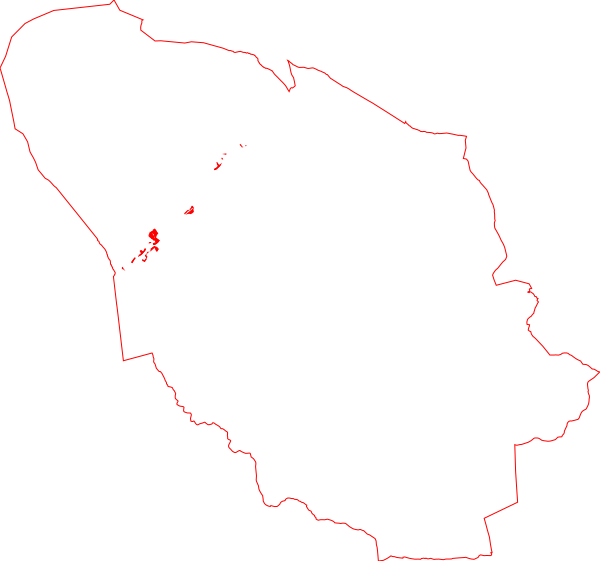

In [25]:
gs.run_command("g.region", vector="commune")
# Instanciation de la carte
urba_map = gj.Map()
# Ajout des hexagons et des commerces
urba_map.d_vect(map="commune", fill_color="none", color="255;0;0" )
urba_map.d_vect(map="parcelles_zone_ux_sans_bati", legend_label="parcelles en zone UX sans bati", fill_color="255;0;0", color="255;0;0" )
# Display map
urba_map.show()

In [ ]:
%%bash

db.select -c sql="select DISTINCT LIBELLE from zone_urba WHERE LIBELONG LIKE '%conomiques'"
v.extract input=zone_urba where="LIBELLE = 'UX'" output=zone_ux
v.overlay ainput=parcelles binput=zone_ux operator=and output=parcelles_zone_ux -t
v.select ainput=parcelles_zone_ux binput=batiment output=parcelles_zone_ux_sans_bati operator=disjoint

### Module de routing (v.net)

#### Isodistance

Je suis propriétaire du restaurant "'Flocons village'", je souhaite connaître à combien de mètres sont les habitants de mon établissement. J'aimerai une carte avec indication [1000, 2000, 5000] mètres.

- Extraire le commerce `v.extract`
- Création du réseau (connection entre point et routes) `v.net` (op=connect)
- Calcul de l'isodistance `v.net.iso`
- Création de la carte `d.mon` et `d.vect`

In [28]:

# Extraction du point du commerce dans la couche 'mon_commerce'
gs.run_command("v.extract", input="commerces", where="nom = 'Flocons village'", output="mon_commerce")
# Création du réseau
gs.run_command("v.net", input="voie", points="mon_commerce", op="connect", thresh="200", out="routes")
# Création des isochrones
gs.run_command("v.net.iso", input="routes", output="routes_iso", center_cats="1-10000", costs=[1000,2000,5000])


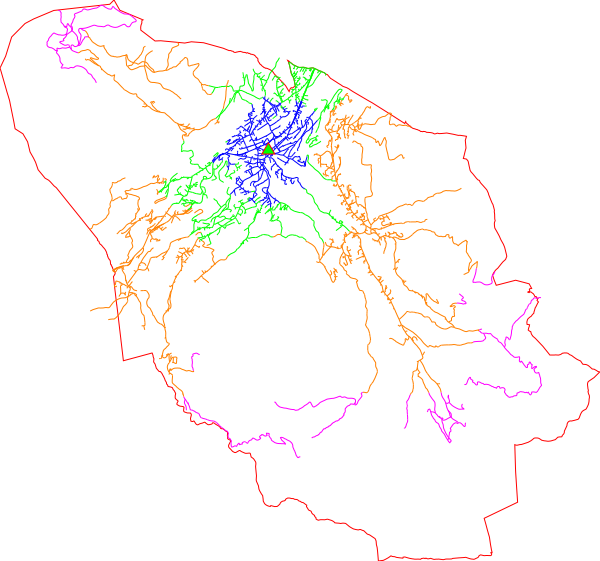

In [32]:

# Instanciation de la carte
net_map = gj.Map()
# Ajout des couches
net_map.d_vect(map="commune", fill_color="none", color="255;0;0" )
net_map.d_vect(map="routes_iso", col="blue", cats="1")
net_map.d_vect(map="routes_iso", col="green", cats="2")
net_map.d_vect(map="routes_iso", col="orange", cats="3")
net_map.d_vect(map="routes_iso", col="magenta", cats="4")
net_map.d_vect(map="routes", col="red", icon="basic/triangle", fcol="green", size=12, layer=2)
# On affiche la carte
net_map.show()

In [ ]:
%%bash
v.extract input=commerces where="nom = 'Flocons village'" output=mon_commerce
v.net voirie points=mon_commerce op=connect thresh=200 out=routes
v.net.iso input=routes output=routes_iso center_cats=1-10000 costs=1000,2000,5000
# ou d.mon start=cairo etc
d.mon wx0
d.vect routes_iso col=blue cats=1
d.vect routes_iso col=green cats=2
d.vect routes_iso col=orange cats=3
d.vect routes_iso col=magenta cats=4
d.vect routes col=red icon=basic/triangle fcol=green size=12 layer=2
# d.mon stop=cairo

#### voyageur de commerce

Je suis des services techniques et je dois informer tous les commerces des travaux à venir.
Mais, on ne va faire que les 100 premiers. Comment je fais pour optimiser mon trajet ?

- Création du réseau (connection routes et commerces) `v.net` (op=connect)
- Calcul du parcours `v.net.salesman` (option center_cats)
- Création de la carte `d.mon` et `d.vect`

In [35]:
# Création du réseau
gs.run_command("v.net", input="voie", points="commerces", op="connect", thresh="2000", out="routes_commerces")
# On ne relie que les 100 premiers
gs.run_command("v.net.salesman", input="routes_commerces", center_cats="1-100", out="salesman")

In [47]:
gs.run_command("g.region", save="salesman_region", vector="salesman")

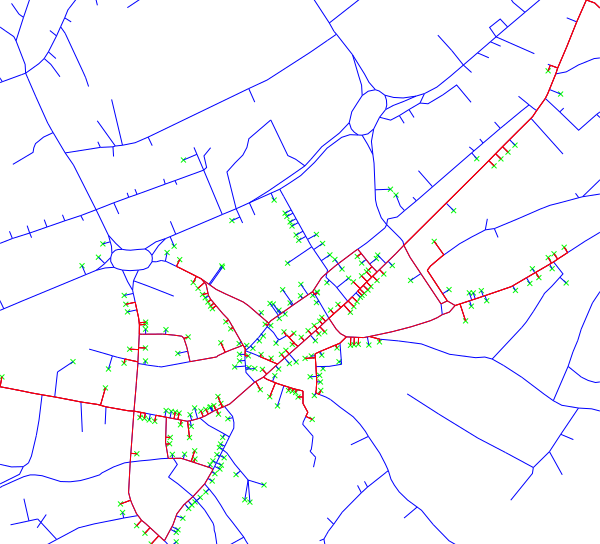

In [49]:
# On va zoomer sur le résultat en créant une région que l'on va utiliser lors de l'instanciation de la carte
gs.run_command("g.region", region="salesman_region", vector="salesman")
# Instanciation de la carte
net_map = gj.Map(saved_region="salesman_region")
# Ajout des couches
net_map.d_vect(map="commune", fill_color="none", color="red" )
net_map.d_vect(map="commerces", col="green")
net_map.d_vect(map="routes_commerces", col="blue")
net_map.d_vect(map="salesman", col="red")
# On affiche la carte
net_map.show()

In [ ]:
# La solution en CLI
%%bash
v.net voirie points=commerces op=connect thresh=2000 out=routes_commerces
v.net.salesman routes_commerces center_cats=1-100 out=salesman
# ou d.mon start=cairo etc
d.mon wx0
d.vect salesman
d.vect commerces cats=1-100
# d.mon stop=cairo

Grass Jupyter peut également utiliser une carte interactive où l'on peut zoomer/dézoomer et utiliser les contrôles classiques.

La classe InteractiveMap affiche les rasters et les vecteurs de GRASS GIS à l'aide de [folium](http://python-visualization.github.io/folium/), une bibliothèque [Leaflet](https://leafletjs.com/) pour Python.

Voici un exemple :

In [52]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [55]:
# Instanciation de la carte
imap = gj.InteractiveMap(width=600, height=480)
# Ajout des couches
imap.add_vector("commune")
imap.add_vector("commerces")
imap.add_vector("routes_commerces")
imap.add_vector("salesman")
imap.add_layer_control(position = "bottomright")

In [56]:
imap.show()

#### Aller plus loin : 

- https://grass.osgeo.org/grass-stable/manuals/topic_network.html
- https://grass.osgeo.org/grass-stable/manuals/v.net.html
- https://grass.osgeo.org/grass-stable/manuals/v.net.iso.html
- https://grass.osgeo.org/grass-stable/manuals/v.net.salesman.html
- https://grass.osgeo.org/grass-stable/manuals/addons/v.isochrones.html (extension)